
Model: bert


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4310 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.145300,0.184867
2,0.261900,0.172094
3,0.064100,0.136601


Değerlendirme Metrikleri: {'eval_loss': 0.13660123944282532, 'eval_runtime': 6.5394, 'eval_samples_per_second': 131.816, 'eval_steps_per_second': 16.515, 'epoch': 3.0}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       332
           1       0.98      0.98      0.98       332
           2       0.95      0.75      0.84        24
           3       0.98      0.95      0.96       174

    accuracy                           0.97       862
   macro avg       0.96      0.92      0.94       862
weighted avg       0.97      0.97      0.97       862



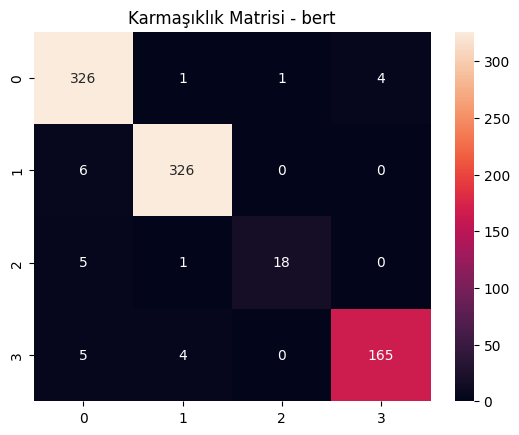

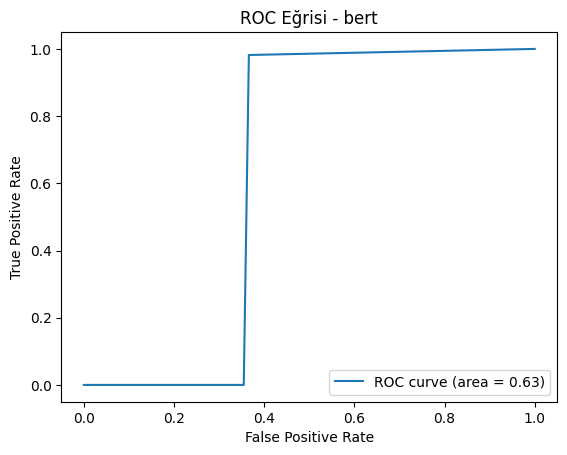


Model: roberta


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4310 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.124400,0.286439
2,0.230400,0.062120
3,0.097600,0.053168


Değerlendirme Metrikleri: {'eval_loss': 0.05316823348402977, 'eval_runtime': 6.2307, 'eval_samples_per_second': 138.347, 'eval_steps_per_second': 17.333, 'epoch': 3.0}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       332
           1       1.00      0.99      0.99       332
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00       174

    accuracy                           0.99       862
   macro avg       1.00      0.99      0.99       862
weighted avg       0.99      0.99      0.99       862



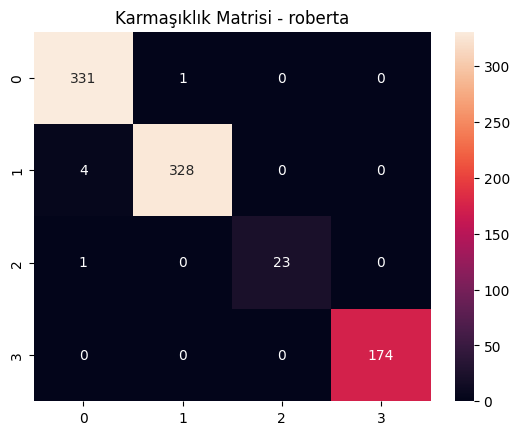

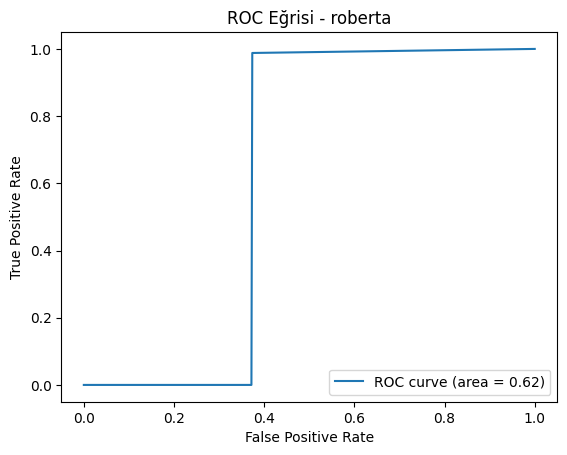


Model: deberta


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4310 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.099500,0.281066
2,0.260300,0.075486
3,0.091600,0.050837


Değerlendirme Metrikleri: {'eval_loss': 0.050836700946092606, 'eval_runtime': 8.697, 'eval_samples_per_second': 99.114, 'eval_steps_per_second': 12.418, 'epoch': 3.0}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       332
           1       1.00      0.98      0.99       332
           2       1.00      0.96      0.98        24
           3       1.00      0.99      1.00       174

    accuracy                           0.99       862
   macro avg       0.99      0.98      0.99       862
weighted avg       0.99      0.99      0.99       862



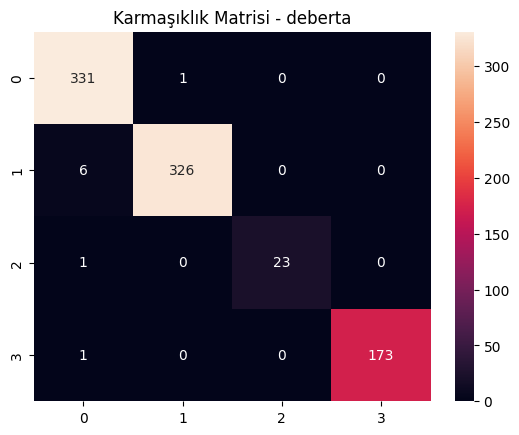

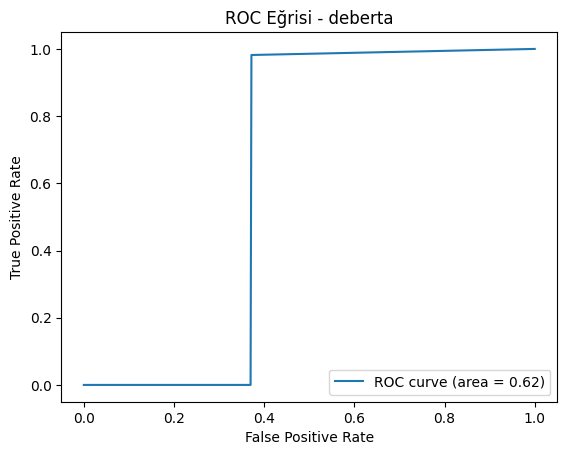


Model: albert


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4310 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.266900,0.278603
2,0.460300,0.145914
3,0.101900,0.120768


Değerlendirme Metrikleri: {'eval_loss': 0.12076763063669205, 'eval_runtime': 7.5115, 'eval_samples_per_second': 114.758, 'eval_steps_per_second': 14.378, 'epoch': 3.0}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       332
           1       0.98      0.99      0.98       332
           2       0.96      0.96      0.96        24
           3       1.00      0.93      0.96       174

    accuracy                           0.98       862
   macro avg       0.98      0.97      0.97       862
weighted avg       0.98      0.98      0.98       862



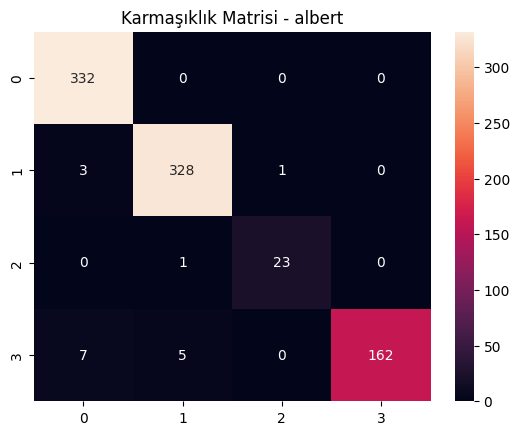

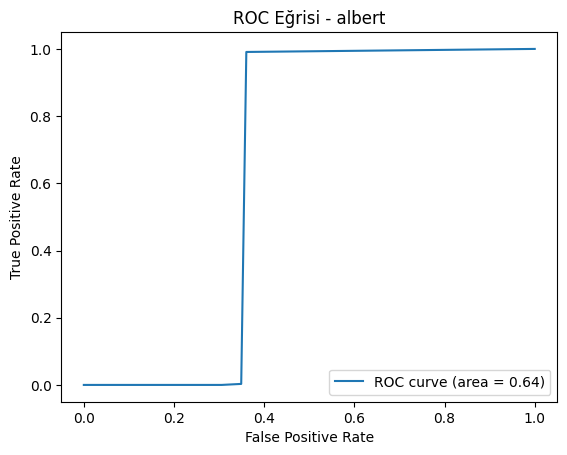

In [ ]:
def main():
    from IPython import get_ipython
    from IPython.display import display
    from google.colab import files
    import xml.etree.ElementTree as ET
    import pandas as pd
    from transformers import (
        BertTokenizer, BertForSequenceClassification,
        RobertaTokenizer, RobertaForSequenceClassification,
        DebertaTokenizer, DebertaForSequenceClassification,
        AlbertTokenizer, AlbertForSequenceClassification,
        TrainingArguments, Trainer
    )
    from datasets import Dataset
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch

    # Veri Yükleme
    xml_path = "/content/drive/MyDrive/Bütün Tarifler.xml"
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # XML'den DataFrame'e Dönüşüm
    data = []
    for ingredients in root.findall('Ingredients'):
        malzemeler = [ingredient.text for ingredient in ingredients.findall('Ingredient') if ingredient.text]
        data.append(" ".join(malzemeler))

    df = pd.DataFrame(data, columns=['malzemeler'])

    # Boş satırları temizle
    df = df[df['malzemeler'].str.strip() != ""]

    # Etiketleme Fonksiyonu
    def etiket_olustur(malzeme_listesi):
        if any(keyword in malzeme_listesi.lower() for keyword in ["yoğurt", "bulgur", "sumak"]):
            return "Turk"
        elif any(keyword in malzeme_listesi.lower() for keyword in ["soy sauce", "tofu", "ginger"]):
            return "Chinese"
        elif any(keyword in malzeme_listesi.lower() for keyword in ["parmesan", "basil", "olive oil"]):
            return "Italian"
        elif any(keyword in malzeme_listesi.lower() for keyword in ["fish and chips", "marmite", "cheddar"]):
            return "British"
        elif any(keyword in malzeme_listesi.lower() for keyword in ["wasabi", "nori", "sake"]):
            return "Japanese"
        return "Other"

    df['etiket'] = df['malzemeler'].apply(etiket_olustur)
    df['etiket'] = pd.factorize(df['etiket'])[0]

    if df.empty:
        raise ValueError("Veri çekme işlemi sonucunda DataFrame boş kaldı. XML dosyasındaki verileri kontrol edin.")

    def tokenize_function(examples, tokenizer):
        try:
            return tokenizer(
                examples['malzemeler'],
                padding='max_length',
                truncation=True,
                max_length=128
            )
        except Exception as e:
            print(f"Hata oluştu: {e}")
            print(f"Problemli veri: {examples}")
            raise

    model_classes = {
        'bert': (BertTokenizer, BertForSequenceClassification, 'bert-base-uncased'),
        'roberta': (RobertaTokenizer, RobertaForSequenceClassification, 'roberta-base'),
        'deberta': (DebertaTokenizer, DebertaForSequenceClassification, 'microsoft/deberta-base'),
        'albert': (AlbertTokenizer, AlbertForSequenceClassification, 'albert-base-v2')
    }

    for model_name, (TokenizerClass, ModelClass, pretrained_model_name) in model_classes.items():
        print(f"\nModel: {model_name}")

        tokenizer = TokenizerClass.from_pretrained(pretrained_model_name)
        model = ModelClass.from_pretrained(pretrained_model_name, num_labels=len(df['etiket'].unique()))

        dataset = Dataset.from_pandas(df)
        tokenized_dataset = dataset.map(
            lambda x: tokenize_function(x, tokenizer),
            batched=True,
            remove_columns=["malzemeler"]
        )
        tokenized_dataset = tokenized_dataset.rename_column('etiket', 'labels')

        train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
        train_dataset = train_test_split['train']
        test_dataset = train_test_split['test']

        if len(train_dataset) == 0 or len(test_dataset) == 0:
            raise ValueError("Eğitim veya test veri seti boş. Etiketleme ve veri bölme işlemini kontrol edin.")

        training_args = TrainingArguments(
            output_dir=f"./results_{model_name}",
            evaluation_strategy="epoch",
            learning_rate=2e-5,
            per_device_train_batch_size=8,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir=f"./logs_{model_name}",
            logging_steps=10,
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
        )

        trainer.train()

        metrics = trainer.evaluate()
        print("Değerlendirme Metrikleri:", metrics)

        predictions, labels, _ = trainer.predict(test_dataset)
        predictions = torch.argmax(torch.tensor(predictions), axis=1)
        print(classification_report(labels, predictions))

        cm = confusion_matrix(labels, predictions)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f"Karmaşıklık Matrisi - {model_name}")
        plt.show()

        fpr, tpr, _ = roc_curve(labels, predictions, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.title(f"ROC Eğrisi - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()


# main fonksiyonu çağrılıyor
main()
